# Chapter 8. Exploratory data analysis
## Notebook for R

In [1]:
install.packages(c("tidyverse", "glue", "maps", "factoextra"))

In [2]:
library(tidyverse)
library(glue)
library(factoextra)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### 8.1 Simple exploratory data analysis

In [3]:

#Load clean data
#Data preparation in cleaning_eurobarometer_r.ipynb
url='http://cssbook.net/d/eurobarometer_nov_2017.csv'
d2= read_csv(url, col_names = TRUE)
print(glue("Shape of my original data: {nrow(d2)} x {ncol(d2)}"))
print("Variables:")
colnames(d2)


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  survey = col_character(),
  uniqid = col_double(),
  date = col_character(),
  country = col_character(),
  marital_status = col_character(),
  educational = col_character(),
  gender = col_character(),
  age = col_double(),
  occupation = col_character(),
  type_community = col_character(),
  household_composition = col_character(),
  support_refugees = col_character(),
  support_migrants = col_character(),
  date_n = col_double(),
  support_refugees_n = col_double(),
  support_migrants_n = col_double(),
  educational_n = col_double()
)




Shape of my original data: 33193 x 17
[1] "Variables:"


[1] "survey"                "uniqid"                "date"                 
 [4] "country"               "marital_status"        "educational"          
 [7] "gender"                "age"                   "occupation"           
[10] "type_community"        "household_composition" "support_refugees"     
[13] "support_migrants"      "date_n"                "support_refugees_n"   
[16] "support_migrants_n"    "educational_n"

In [4]:
table_gender = d2 %>%
  group_by(gender) %>%
  summarise(frequency = n()) %>%
  mutate(rel_freq = frequency / sum(frequency))   
table_gender

`summarise()` ungrouping output (override with `.groups` argument)



gender,frequency,rel_freq
<chr>,<int>,<dbl>
Man,15477,0.466273
Woman,17716,0.533727


In [5]:
table_support = d2 %>%
  group_by(support_refugees) %>%
  summarise(frequency = n()) %>%
  mutate(rel_freq = frequency / sum(frequency)) 
table_support

`summarise()` ungrouping output (override with `.groups` argument)



support_refugees,frequency,rel_freq
<chr>,<int>,<dbl>
Tend to agree,12695,0.3824602
Tend to disagree,5391,0.1624138
Totally agree,4957,0.1493387
Totally disagree,3574,0.1076733
NA,6576,0.1981141


In [6]:
print(glue("Number of missing values in the variable support_refugees: {(sum(is.na(d2$support_refugees)))}"))

d2 = d2 %>% drop_na()
print(glue("Shape of my data without missing values {dim(d2)[1]} x {dim(d2)[2]}"))

Number of missing values in the variable support_refugees: 6576
Shape of my data without missing values 23448 x 17


In [7]:
print("Crosstab gender and support_refugees:")
crosstab_gender_support = d2%>%
  group_by(gender, support_refugees)%>%
  summarise(n=n())%>%
  spread(gender, n)  
crosstab_gender_support

print("Summary statistics for group of cases:")
summary_statistics = d2%>%
  group_by(support_refugees, gender)%>%
  summarise(mean_age=mean(age, na.rm = TRUE))%>%
  spread(gender, mean_age)   
summary_statistics

[1] "Crosstab gender and support_refugees:"


`summarise()` regrouping output by 'gender' (override with `.groups` argument)



support_refugees,Man,Woman
<chr>,<int>,<int>
Tend to agree,5067,5931
Tend to disagree,2176,2692
Totally agree,2118,2178
Totally disagree,1524,1762


[1] "Summary statistics for group of cases:"


`summarise()` regrouping output by 'support_refugees' (override with `.groups` argument)



support_refugees,Man,Woman
<chr>,<dbl>,<dbl>
Tend to agree,54.07302,53.37380
Tend to disagree,52.81985,52.65676
Totally agree,53.73890,52.42195
Totally disagree,52.36811,53.20375


### 8.2 Visualizing data

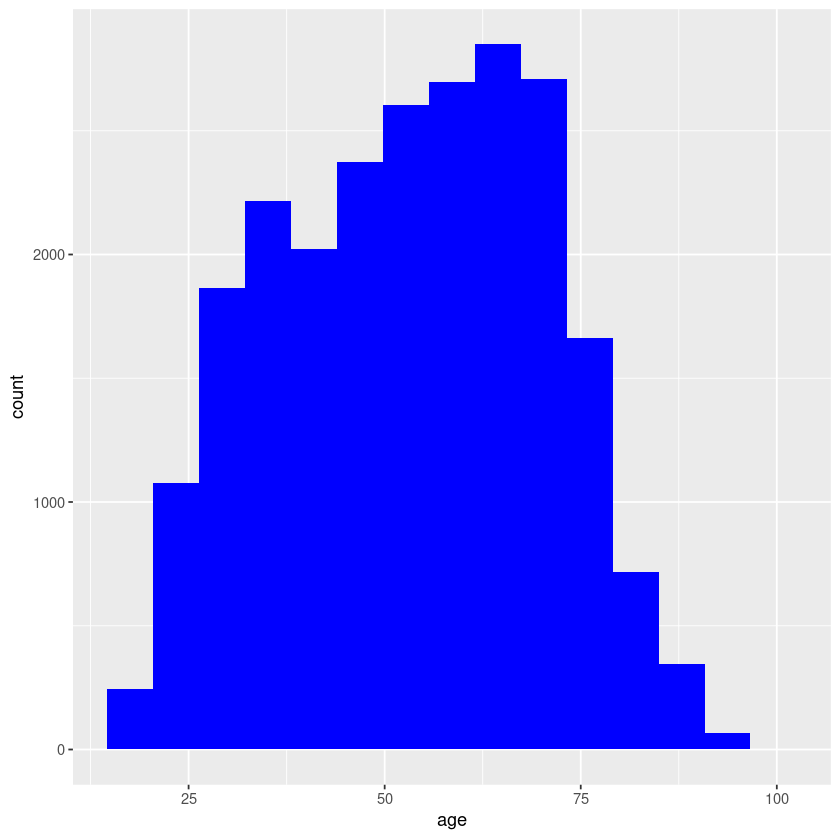

In [8]:
ggplot (data=d2) +
  geom_histogram(mapping = aes(x= age), bins = 15, fill=I("blue"))

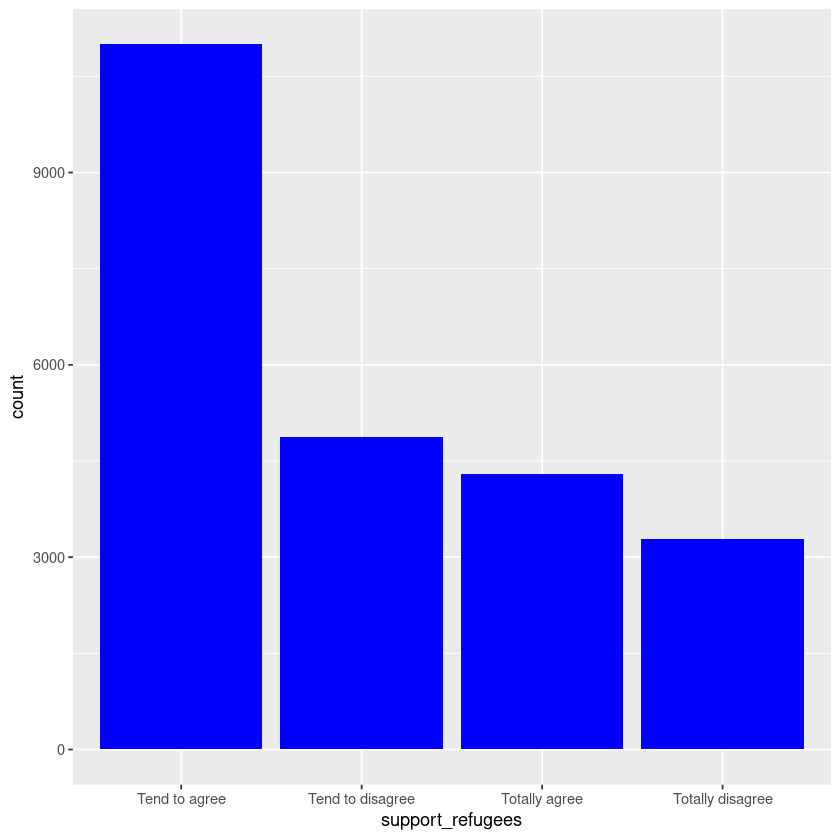

In [9]:
ggplot (data=d2) +
  geom_bar(mapping = aes(x= support_refugees), fill=I("blue"))

`summarise()` ungrouping output (override with `.groups` argument)



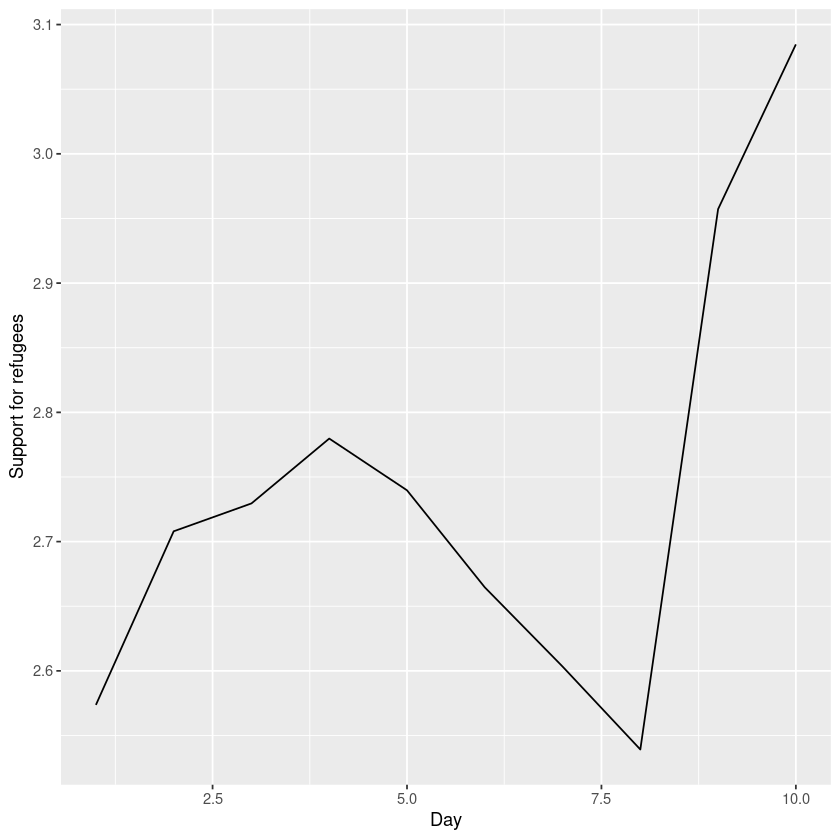

In [12]:
support_refugees = d2 %>%
  group_by(date_n) %>%
  summarise(support=mean(support_refugees_n, na.rm = TRUE))

ggplot(support_refugees, aes(x=date_n, y=support)) + 
  geom_line() + xlab("Day") + ylab("Support for refugees")

`summarise()` ungrouping output (override with `.groups` argument)



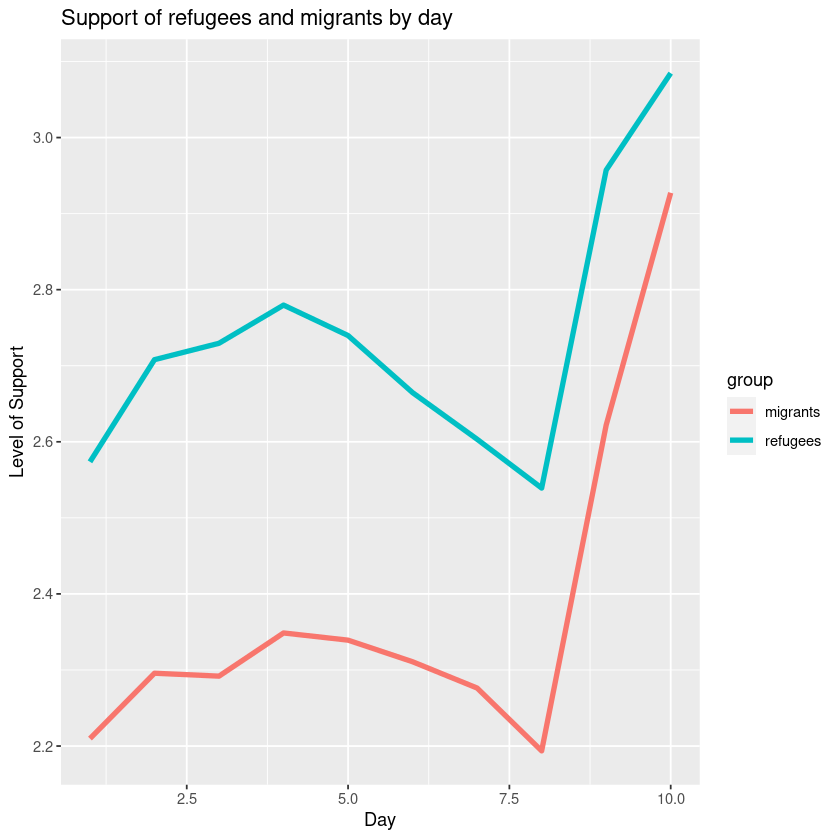

In [21]:
# Combine data
support_combined = d2 %>% group_by(date_n) %>%
  summarise(refugees=mean(support_refugees_n, na.rm = TRUE),
            migrants=mean(support_migrants_n, na.rm = TRUE))

# Pivot to long format and plot 
support_long = pivot_longer(support_combined, -date_n, 
                            names_to="group", values_to="support")
ggplot(support_long, aes(x = date_n, y=support, colour=group)) +
  geom_line(size = 1.5) +
  labs(title = "Support of refugees and migrants by day", 
       x = "Day", y = "Level of Support") 

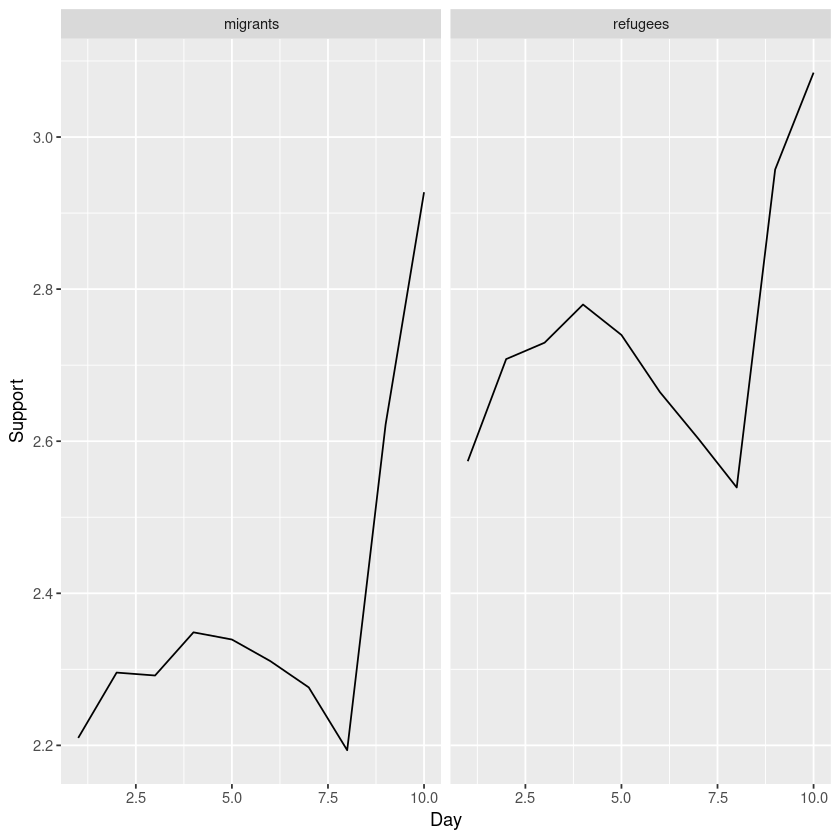

In [23]:
ggplot(support_long, aes(x=date_n, y=support)) +  
  geom_line() + facet_grid(cols=vars(group)) +
  xlab("Day") + ylab("Support")

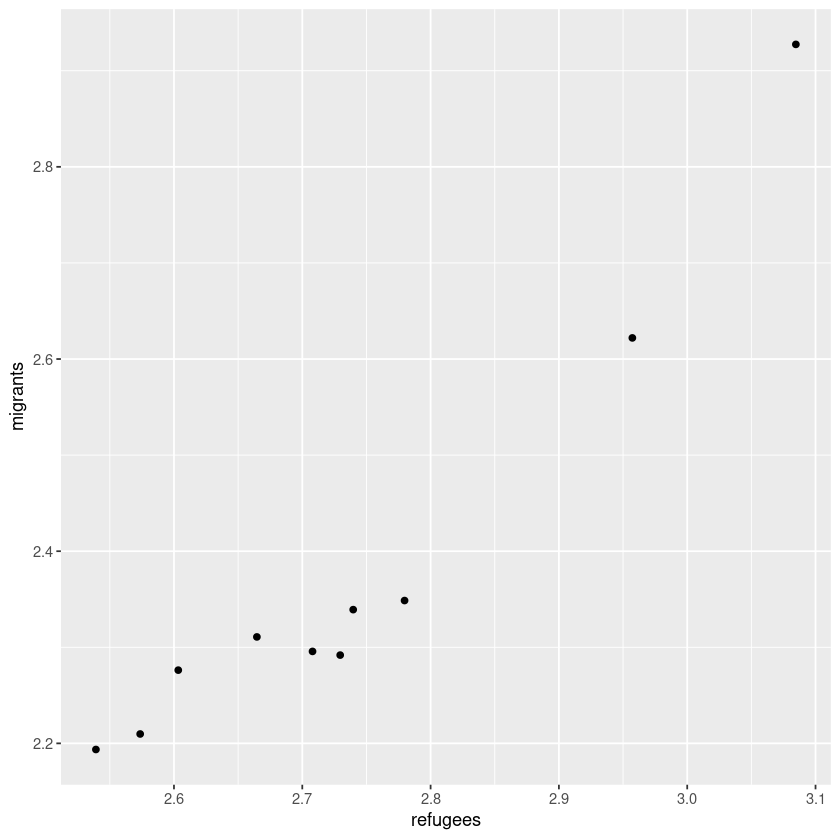

In [24]:
ggplot(support_combined, aes(x=refugees, y=migrants))+
  geom_point()

`geom_smooth()` using formula 'y ~ x'



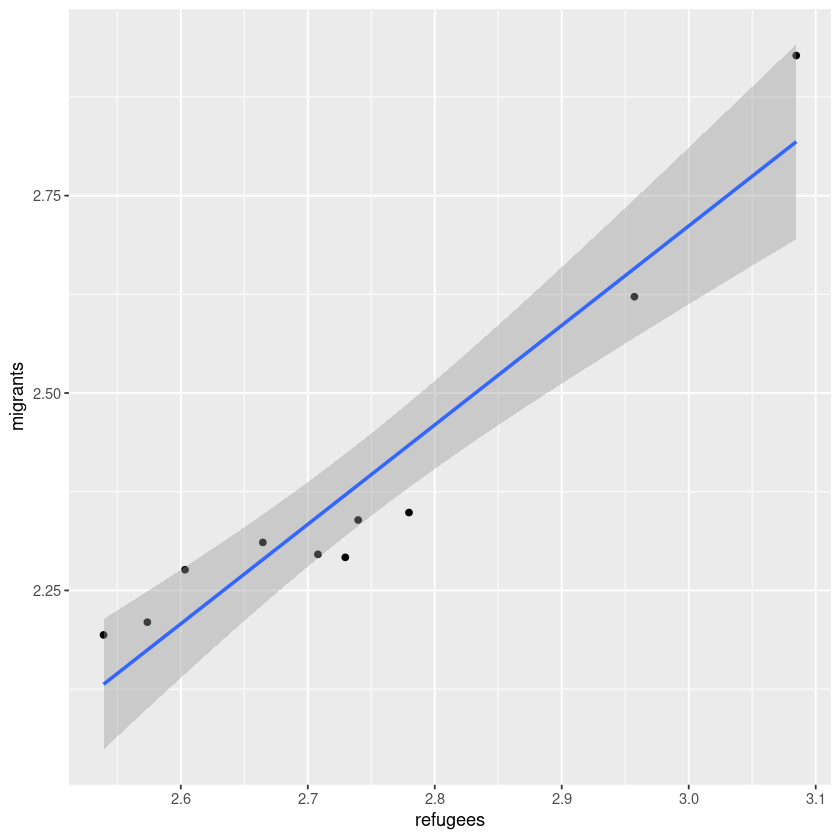

In [25]:
ggplot(support_combined, aes(x=refugees, y= migrants))+
  geom_point()+
  geom_smooth(method = lm)

In [27]:
print(cor(support_combined$refugees, support_combined$migrants, method = "pearson"))

[1] 0.9541243


In [28]:
pivot_data= d2 %>% select (gender, country, support_refugees_n)
pivot_data = pivot_data %>% mutate(country=factor(country,levels=rev(sort(unique(country))))) 
pivot_data= group_by(pivot_data, country, gender) 
pivot_data = summarise(pivot_data, score = mean(support_refugees_n))

`summarise()` regrouping output by 'country' (override with `.groups` argument)



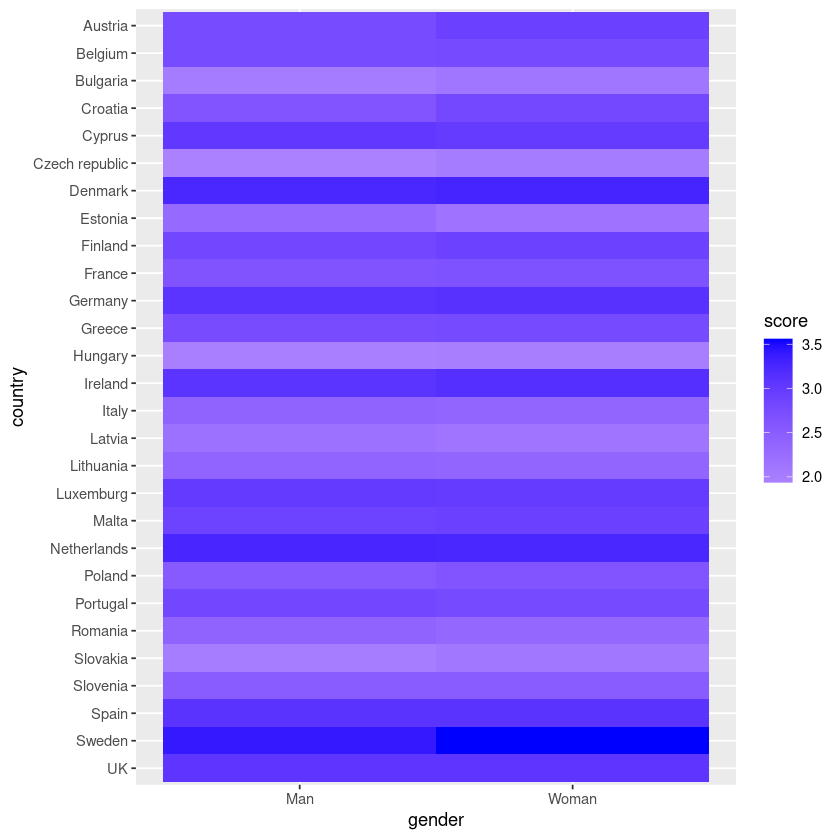

In [29]:
ggplot(pivot_data, aes(x = gender, y = country, fill = score)) + geom_tile()+
  scale_fill_gradient2(low="white", high="blue", guide="colorbar")

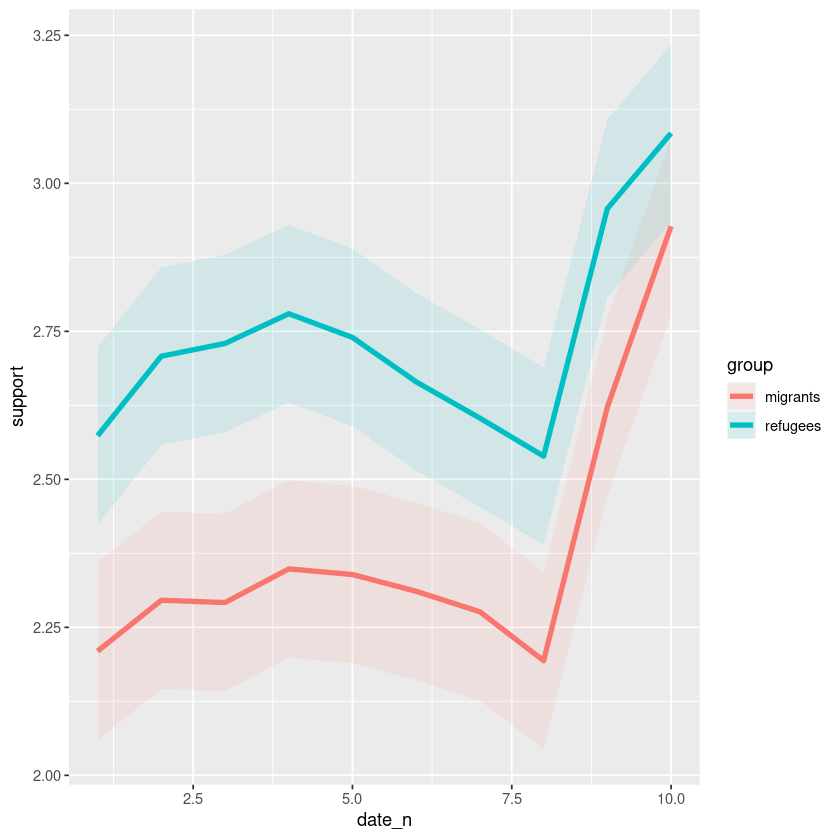

In [43]:
ggplot(support_long, aes(x=date_n, y=support, color=group)) + 
  geom_line(size=1.5) + 
  geom_ribbon(aes(fill=group, ymin=support-0.15, ymax=support+0.15),
              alpha=.1, lty=0)

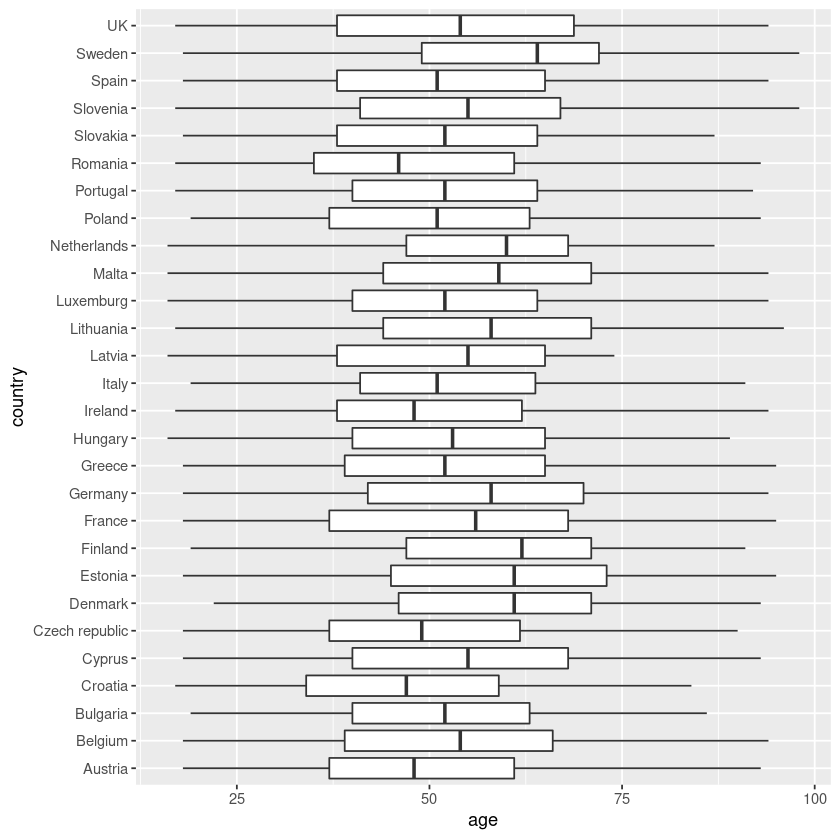

In [45]:
d2 = d2 %>% mutate(country=factor(country,levels=rev(sort(unique(country))))) #order the countries
ggplot(data = d2, mapping= aes(x=country, y=age))+
  geom_boxplot()+
  coord_flip() #We rotate the graph for a better visualization of country labels

`summarise()` ungrouping output (override with `.groups` argument)



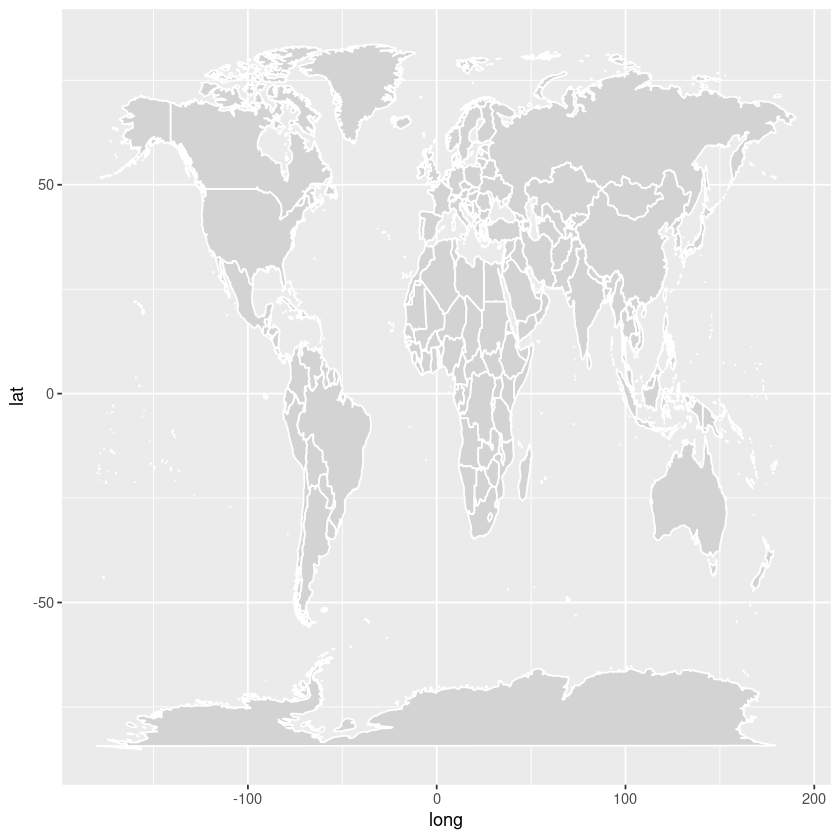

In [46]:
#Generate dataframe with average level of support to refugees by country
mean_support_refugees_by_country = d2%>%
  group_by(country)%>%
  summarise(mean_support_refugees=mean(support_refugees_n, na.rm = TRUE))

supports_country <- as.data.frame(cbind(mean_support_refugees_by_country))

#Load a world map and plot it
world_map = map_data("world")

ggplot(world_map, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill="lightgray", colour = "white")

In [47]:
some.eu.countries = c(
  "Portugal", "Spain", "France", "Germany",
  "Austria", "Belgium", "UK", "Netherlands",
  "Denmark", "Poland", "Italy", 
  "Croatia", "Slovenia", "Hungary", "Slovakia",
  "Czech republic", "Greece", "Finland", "Ireland",
  "Luxemburg", "Sweden", "Sweden", "Bulgaria", "Latvia",
  "Estonia", "Lithuania", "Malta", "Romania", "Cyprus")
some.eu.maps = map_data("world", region = some.eu.countries)
some.eu.maps = some.eu.maps %>% rename(country = region)
support.map = left_join(supports_country, some.eu.maps, by = "country")

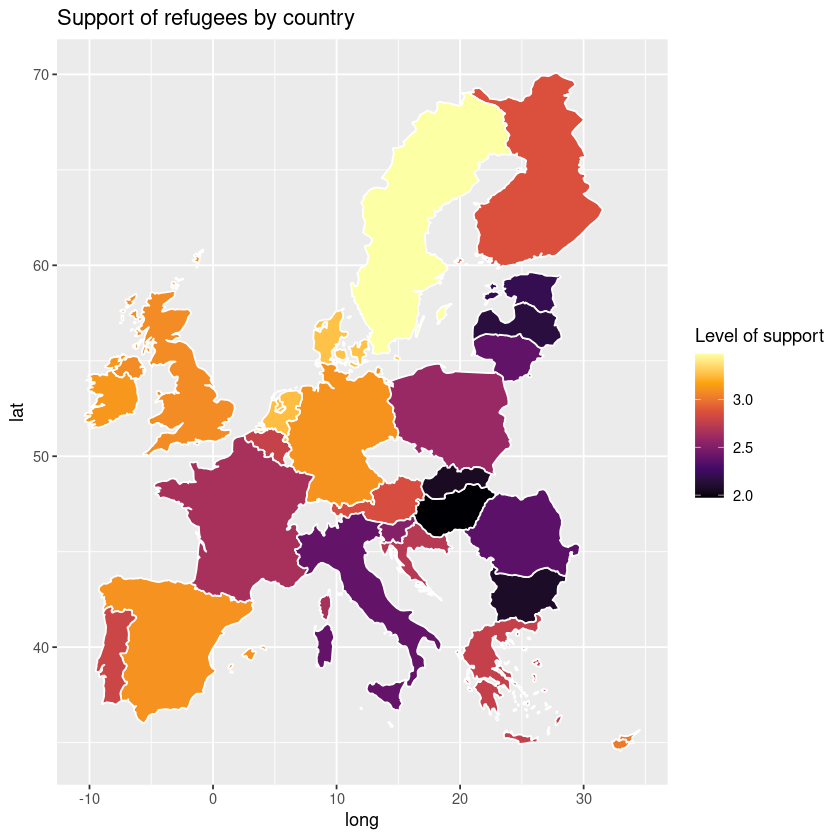

In [48]:
ggplot(support.map, aes(long, lat, group = group))+
  geom_polygon(aes(fill = mean_support_refugees), color = "white")+
  scale_fill_viridis_c(option = "B")+
  labs(title = "Support of refugees by country", fill = "Level of support")

### 8.3 Clustering and dimensionality reduction

`summarise()` ungrouping output (override with `.groups` argument)



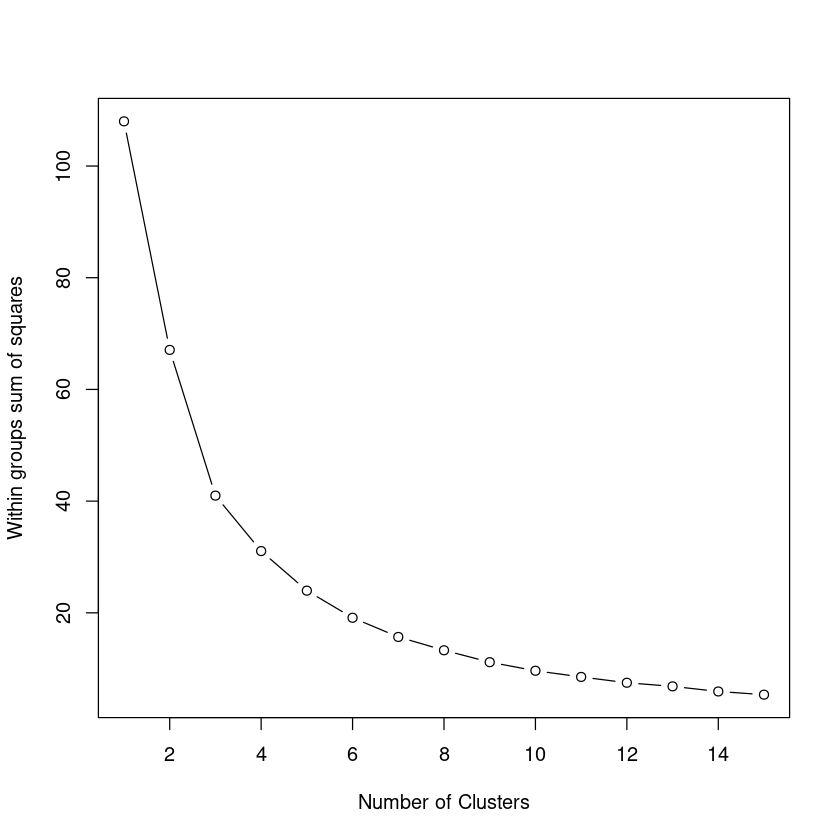

In [49]:
#select variables for matrix
#We get the average of each variable by country
d3 = d2%>%
  group_by(country)%>%
  summarise(mean_support_refugees=mean(support_refugees_n, na.rm = TRUE), 
            mean_support_migrants=mean(support_migrants_n, na.rm = TRUE),
            mean_age=mean(age, na.rm = TRUE),
            mean_educational=mean(educational_n, na.rm = TRUE))
d3 = d3 %>% column_to_rownames(., var = "country")
d3_s = scale(d3) # Scaling the data
# For 1 to 15 cluster centers
wss = 0
for (i in 1:15) {
  km.out <- kmeans(d3_s, centers = i, nstart = 25)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss }
# Plot total within sum of squares vs. number of clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

In [50]:
set.seed(123)
km.res <- kmeans(d3_s, 3, nstart = 25)
print(km.res)

K-means clustering with 3 clusters of sizes 13, 3, 12

Cluster means:
  mean_support_refugees mean_support_migrants    mean_age mean_educational
1            -0.8739722            -0.8108671 -0.38220489       -0.2117152
2             1.1883363             0.9988783  1.75318903        2.4510670
3             0.6497192             0.6287198 -0.02424197       -0.3834086

Clustering vector:
       Austria        Belgium       Bulgaria        Croatia         Cyprus 
             3              3              1              1              3 
Czech republic        Denmark        Estonia        Finland         France 
             1              2              1              2              3 
       Germany         Greece        Hungary        Ireland          Italy 
             3              1              1              3              1 
        Latvia      Lithuania      Luxemburg          Malta    Netherlands 
             1              1              3              3              3 
  

Too few points to calculate an ellipse



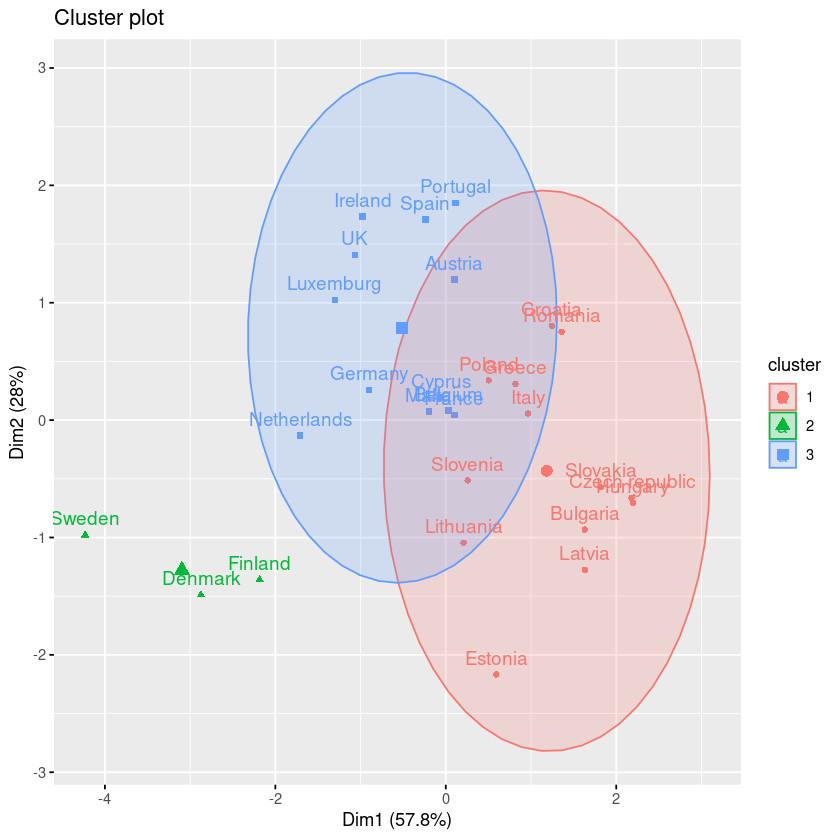

In [51]:
fviz_cluster(km.res, d3, ellipse.type = "norm")



In [52]:
# PAM clustering
#require(cluster)
#pam.res = pam(d3_s, 3)

In [53]:
hc.res <- hcut(d3_s, hc_method = "complete") #more methods: "average", "single", "centroid"
summary(hc.res)

            Length Class  Mode     
merge        54    -none- numeric  
height       27    -none- numeric  
order        28    -none- numeric  
labels       28    -none- character
method        1    -none- character
call          3    -none- call     
dist.method   1    -none- character
cluster      28    -none- numeric  
nbclust       1    -none- numeric  
silinfo       3    -none- list     
size          2    -none- numeric  
data        112    -none- numeric  

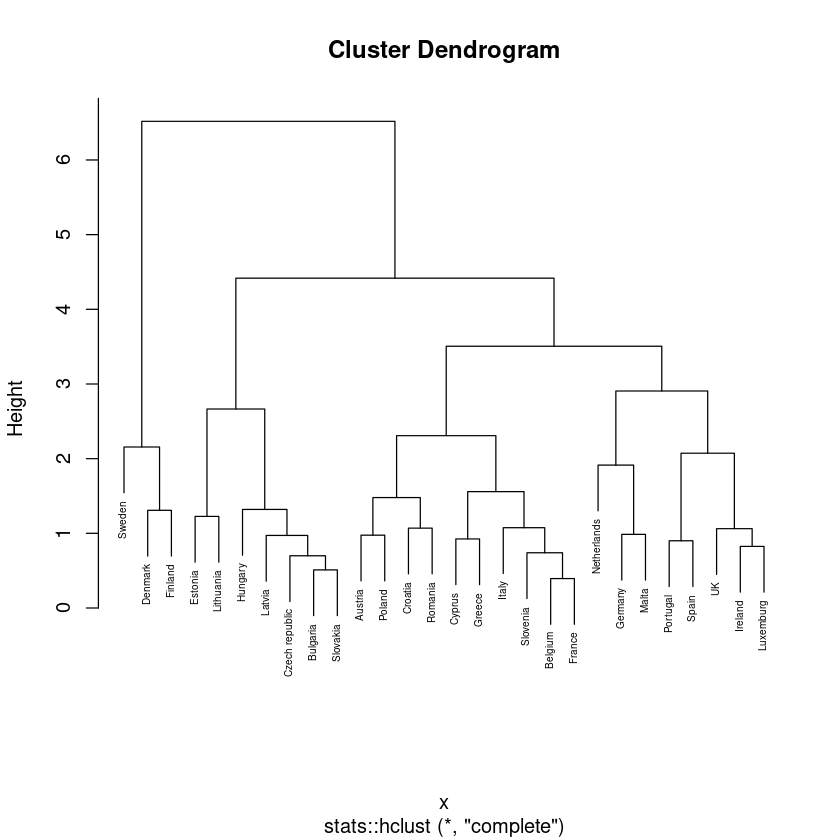

In [54]:
plot(hc.res, cex = 0.5)

In [55]:
hc.res <- hcut(d3_s, k = 3, hc_method = "complete") 
summary(hc.res)

            Length Class  Mode     
merge        54    -none- numeric  
height       27    -none- numeric  
order        28    -none- numeric  
labels       28    -none- character
method        1    -none- character
call          3    -none- call     
dist.method   1    -none- character
cluster      28    -none- numeric  
nbclust       1    -none- numeric  
silinfo       3    -none- list     
size          3    -none- numeric  
data        112    -none- numeric  

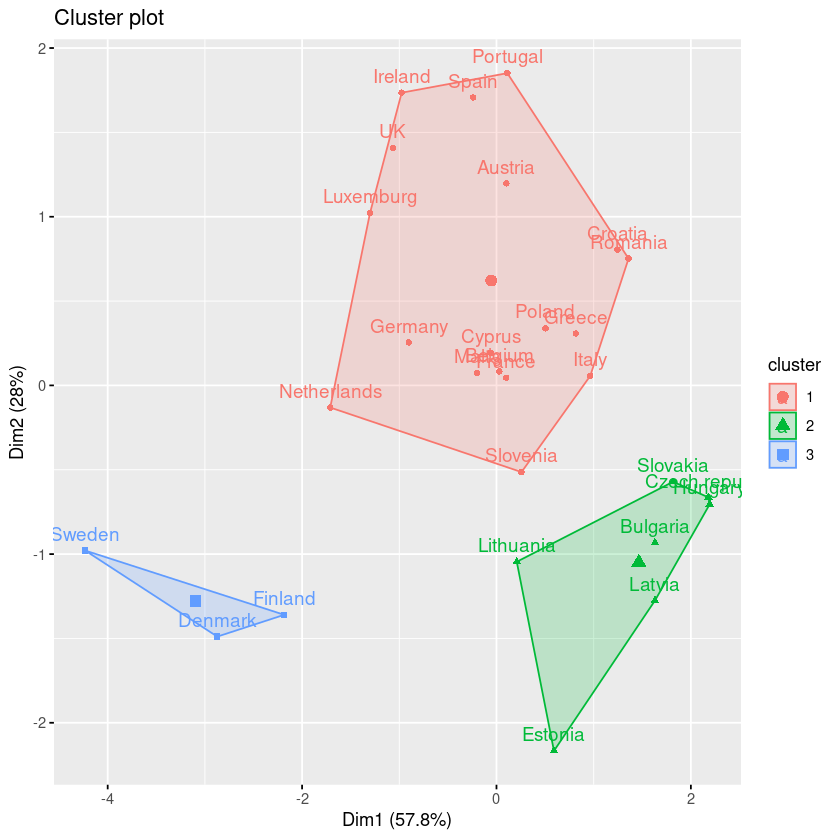

In [56]:
fviz_cluster(hc.res, d3_s, ellipse.type = "convex")

In [57]:
pca = prcomp(d3, scale = TRUE)
head(pca$x)
pca$rotation

,PC1,PC2,PC3,PC4
Austria,0.10142430,1.19803416,0.52602091,-0.06568251
Belgium,0.02882642,0.08318037,-0.05058673,-0.22350741
Bulgaria,1.63059623,-0.93242257,0.47168110,0.14910143
Croatia,1.24466229,0.80433304,0.90406722,-0.82847927
Cyprus,-0.05949790,0.19239739,-0.56333279,-0.79787757
Czech republic,2.17979559,-0.66348027,0.74991773,0.08459459


,PC1,PC2,PC3,PC4
mean_support_refugees,-0.5732924,0.3690096,-0.13985877,-0.71805799
mean_support_migrants,-0.5135857,0.5331396,0.09428317,0.66565948
mean_age,-0.4451170,-0.5586008,-0.67099390,0.19900549
mean_educational,-0.4576422,-0.5172613,0.72202312,-0.04107309


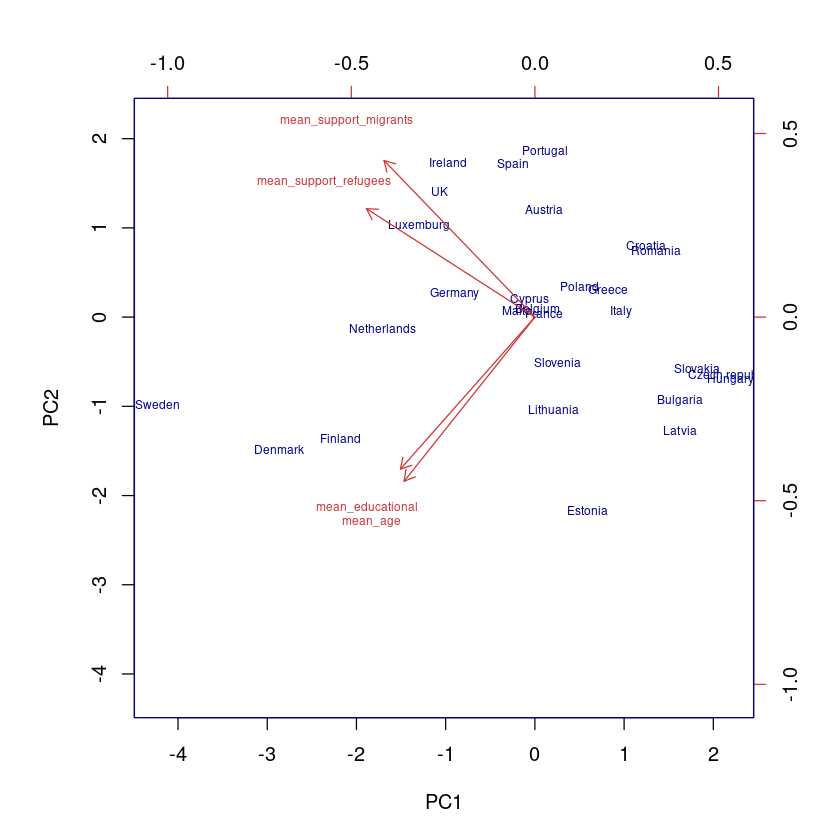

In [58]:
biplot(x = pca, scale = 0, cex = 0.6, col = c("blue4", "brown3"))

In [59]:
print("Proportion of variance explained:")
pca$sdev^2
prop_variance = pca$sdev^2 / sum(pca$sdev^2)
prop_variance

[1] "Proportion of variance explained:"


[1] 2.3139427 1.1189917 0.4137998 0.1532657

[1] 0.57848569 0.27974794 0.10344996 0.03831642

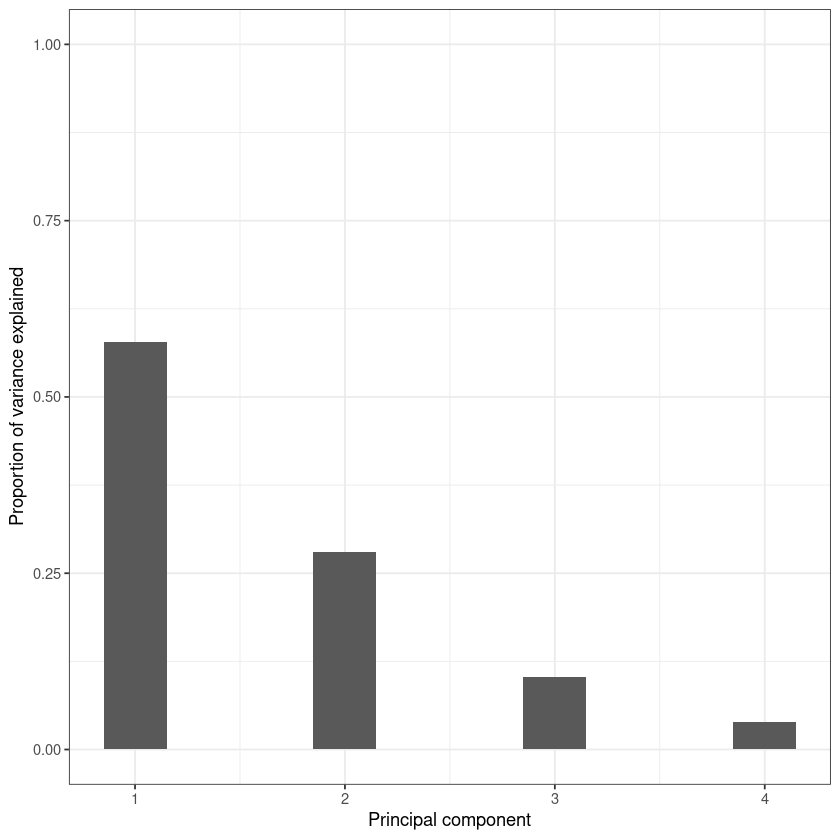

In [60]:
ggplot(data = data.frame(prop_variance, pc = 1:4),
       aes(x = pc, y = prop_variance)) +
  geom_col(width = 0.3) +
  scale_y_continuous(limits = c(0,1)) +
  theme_bw() +
  labs(x = "Principal component",
       y = "Proportion of variance explained")

In [61]:
print("Cumulative explained variance:")
prop_acum_variance = cumsum(prop_variance)
prop_acum_variance

[1] "Cumulative explained variance:"


[1] 0.5784857 0.8582336 0.9616836 1.0000000

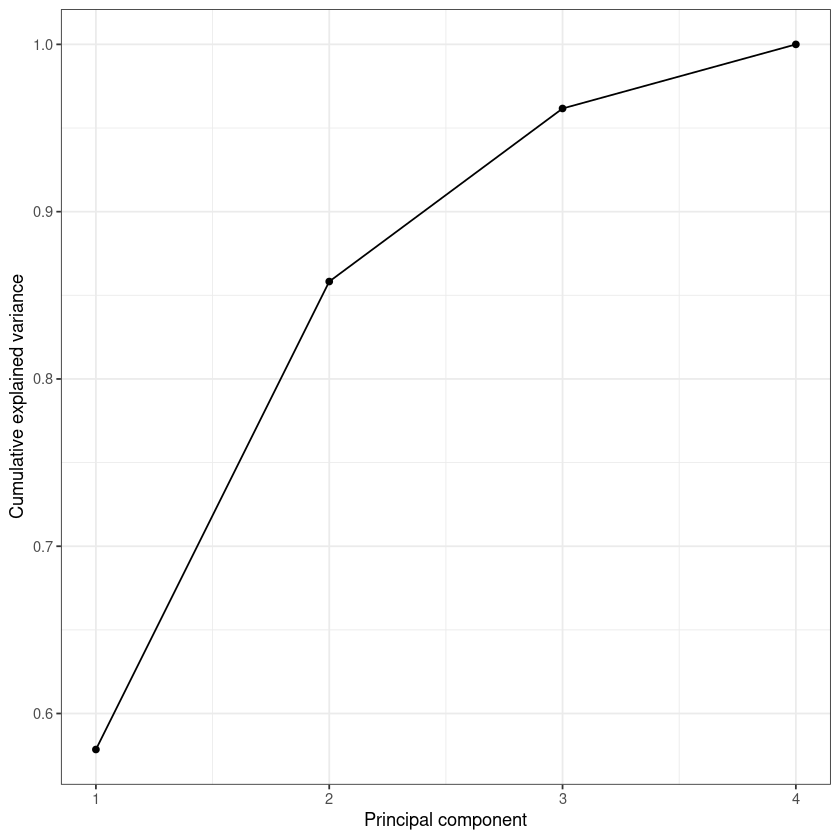

In [62]:
ggplot(data = data.frame(prop_acum_variance, pc = 1:4),
       aes(x = pc, y = prop_acum_variance, group = 1)) +
  geom_point() +
  geom_line() +
  theme_bw() +
  labs(x = "Principal component",
       y = "Cumulative explained variance")

,PC1,PC2
Austria,0.10142430,1.19803416
Belgium,0.02882642,0.08318037
Bulgaria,1.63059623,-0.93242257
Croatia,1.24466229,0.80433304
Cyprus,-0.05949790,0.19239739
Czech republic,2.17979559,-0.66348027


K-means clustering with 3 clusters of sizes 12, 4, 12

Cluster means:
         PC1        PC2
1  1.2412116 -0.4960105
2 -2.7499003 -0.9898963
3 -0.3245781  0.8259759

Clustering vector:
       Austria        Belgium       Bulgaria        Croatia         Cyprus 
             3              3              1              1              3 
Czech republic        Denmark        Estonia        Finland         France 
             1              2              1              2              3 
       Germany         Greece        Hungary        Ireland          Italy 
             3              1              1              3              1 
        Latvia      Lithuania      Luxemburg          Malta    Netherlands 
             1              1              3              3              2 
        Poland       Portugal        Romania       Slovakia       Slovenia 
             3              3              1              1              1 
         Spain         Sweden             UK 
        

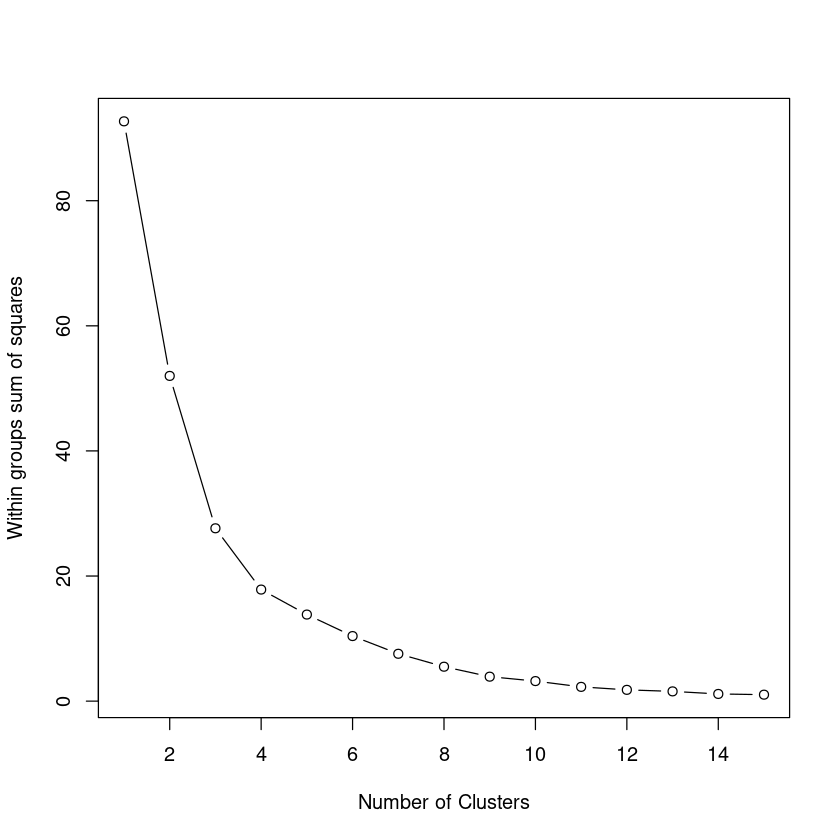

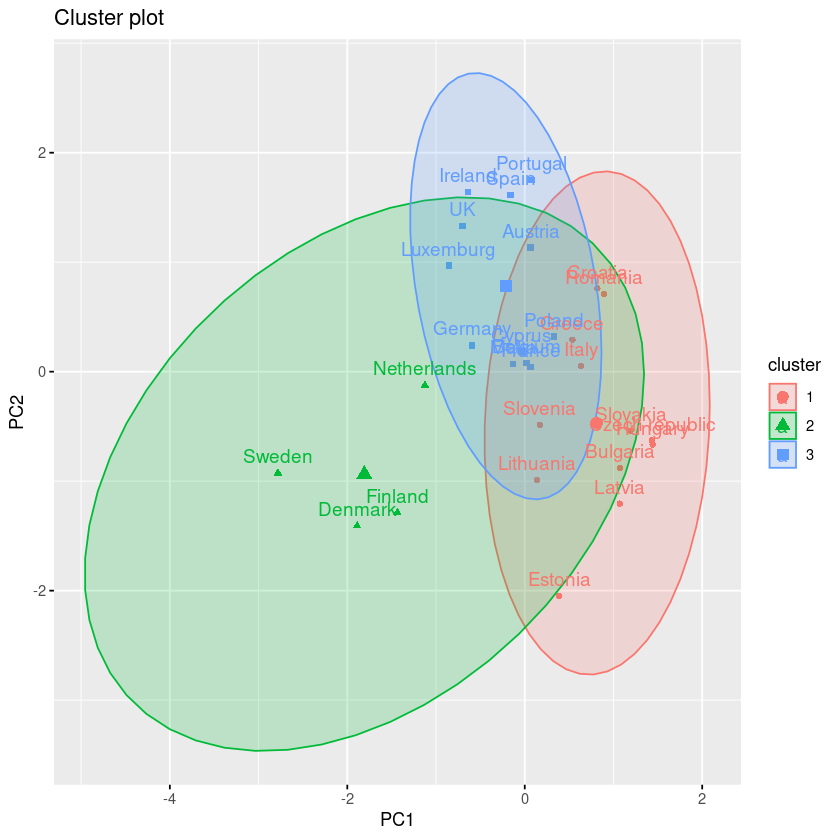

In [63]:
#Generate a new dataset with only two variables (PC1, PC2)
d5 = pca$x
d5 = subset(d5, TRUE, c(PC1, PC2))
head(d5)

#Get optimal number of clusters
wss_5 = 0
for (i in 1:15) {
  km.out_5 <- kmeans(d5, centers = i, nstart = 20)
  wss_5[i] <- km.out_5$tot.withinss }

plot(1:15, wss_5, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

# Compute again k-means with k = 3 and visualize the clusters
set.seed(123)
km.res_5 <- kmeans(d5, 3, nstart = 25)
print(km.res_5)
fviz_cluster(km.res_5, d5, ellipse.type = "norm")